# 확장된 보스턴 주택가격에 라쏘 적용

In [2]:
# 데이터가져오기 / test데이터 분리
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'])

In [3]:
# Lasso 적용
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

In [4]:
# 각각 점수 보기
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

# shape(데이터개수, 특성 수)
X_train.shape

0.6688794836279606
0.6947950162418919


(379, 13)

In [16]:
# numpy를 쓰기 위해서
import numpy as np
print(np.sum(lasso.coef_!=0))

10


# max_iter(반복 실해하는 최대횟수)

In [6]:
# alpha를 0.01로 설정
lasso001 = Lasso(alpha=0.01, max_iter=100).fit(X_train, y_train)

In [17]:
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_!=0))

0.5287495071416068
0.5425379740187777
4


In [18]:
# alpha를 10로 설정
lasso10 = Lasso(alpha=10, max_iter=100).fit(X_train, y_train)

In [19]:
print(lasso10.score(X_train, y_train))
print(lasso10.score(X_test, y_test))
print(np.sum(lasso10.coef_!=0))

0.5287495071416068
0.5425379740187777
4


In [14]:
# alpha를 0.0001로 설정
lasso00001 = Lasso(alpha=0.0001, max_iter=100).fit(X_train, y_train)

In [20]:
print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))
print(np.sum(lasso00001.coef_!=0))

0.7342821736025038
0.7355718311642994
13


# alpha값이 다른 모델들의 계수를 그래프

In [24]:
# plt을 쓰기 위해서는 matplotlib를 가져와야한다
from matplotlib import pyplot as plt

Text(0, 0.5, 'coef size')

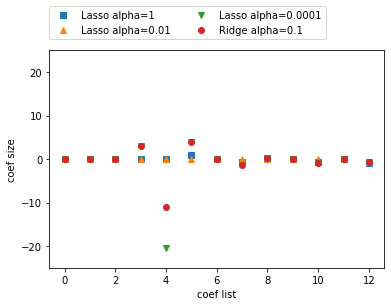

In [34]:
# plt.plot는 라인플롯을 그리는 함수
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

# ridge와의 비교를 위해 ridge가져오기
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge01 = Ridge(alpha=1).fit(X_train, y_train)
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

# legend함수로 위치를 잡는다. ncol은 col loc는 위치
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)

#계수목록, 계수크기(한글쓰려면 폰트를 따로 설치해야됨)
plt.xlabel("coef list")
plt.ylabel("coef size")